In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 95% 155M/163M [00:02<00:00, 85.7MB/s]
100% 163M/163M [00:02<00:00, 68.7MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
with_mask_files =os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [ ]:
#  with mask 1
#  without masl 0
with_mask_lable = [1]*len(with_mask_files)
without_mask_lable = [0]*len(without_mask_files)

In [ ]:
label = with_mask_lable +without_mask_lable

In [ ]:
with_mask_path = '/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



for img_file in without_mask_files:
  image = Image.open(without_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)




/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)

7553

In [ ]:
# convert label in numpy
x = np.array(data)
y = np.array(label)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
num_class=2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))

model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_class,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit(x_train_scaled,y_train,epochs =5,validation_split=0.1)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 115s 656ms/step - acc: 0.7561 - loss: 0.5130 - val_acc: 0.8826 - val_loss: 0.2829
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 137s 627ms/step - acc: 0.8845 - loss: 0.2970 - val_acc: 0.8893 - val_loss: 0.2638
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 144s 635ms/step - acc: 0.9115 - loss: 0.2223 - val_acc: 0.8909 - val_loss: 0.2528
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 137s 609ms/step - acc: 0.9352 - loss: 0.1867 - val_acc: 0.9190 - val_loss: 0.2039
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 149s 651ms/step - acc: 0.9469 - loss: 0.1545 - val_acc: 0.9091 - val_loss: 0.2432


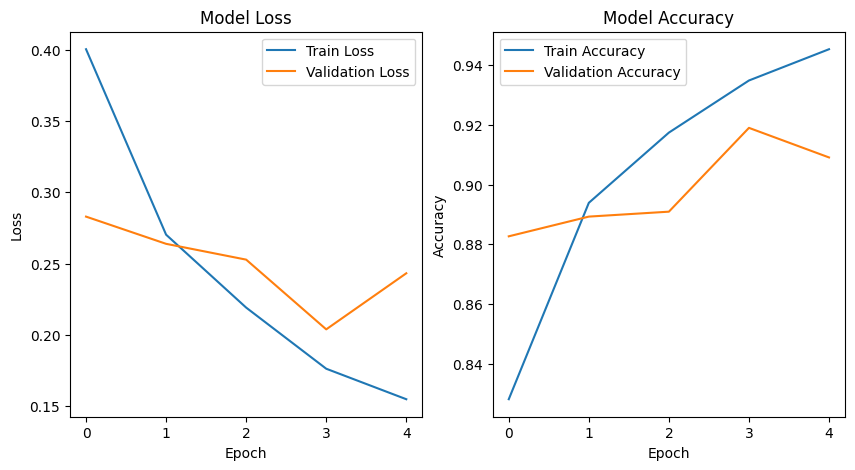

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - acc: 0.9307 - loss: 0.1834
Test Loss: 0.2009
Test Accuracy: 92.92%
